In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [64]:
df = pd.read_csv("data/aug_train.csv")

In [65]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

# Fill NaN with mode

In [6]:
fillna_list = ["gender", "enrolled_university", "education_level", "experience", "major_discipline", "company_size", "company_type", "last_new_job"]
for item in fillna_list:
    df[item] = df[item].fillna(df[item].mode()[0])
#df = df.dropna()

In [7]:
df.drop(columns=["enrollee_id", "city"], inplace=True)

In [79]:
df["experience_origin"] = df["experience"]
df["experience"] = df["experience"].replace("<1", 0.5)
df["experience"] = df["experience"].replace(">20", 21)
df["experience"] = pd.to_numeric(df["experience"])
# Binning the "experience" columns
df["experience"] = pd.cut(df["experience"], [0,1,5,10,15,20,21], labels=["<1", "1-5", "6-10", "11-15", "16-20", ">20"])

In [9]:
df["company_size"] = df["company_size"].replace("10/49", "10-49")

# Exploratory data analysis

<AxesSubplot:title={'center':'1.0: Look for job change, 0.0: Work for the company'}, ylabel='counts'>

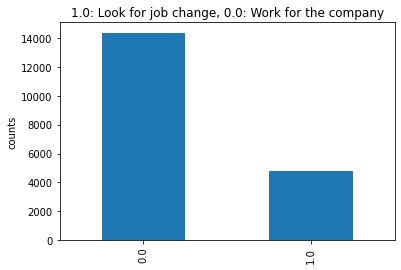

In [77]:
df["target"].value_counts().plot(kind="bar", title="1.0: Look for job change, 0.0: Work for the company", ylabel="counts")

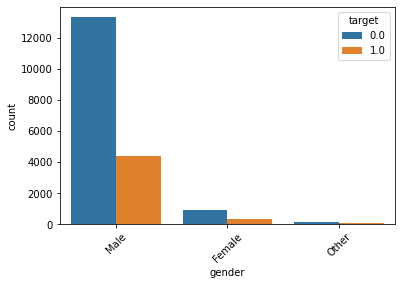

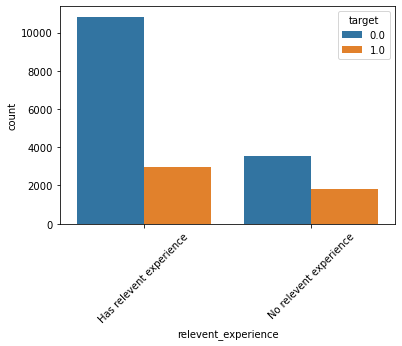

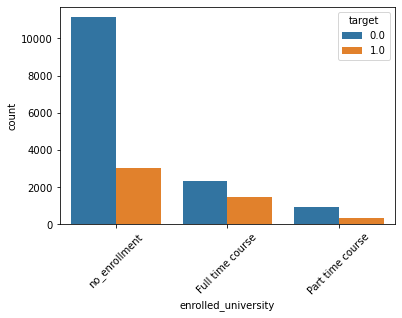

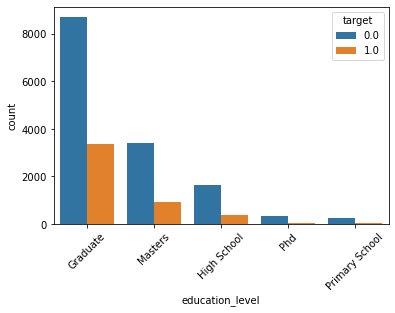

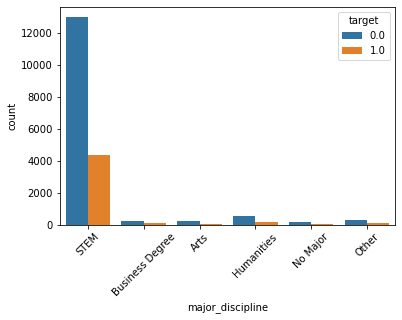

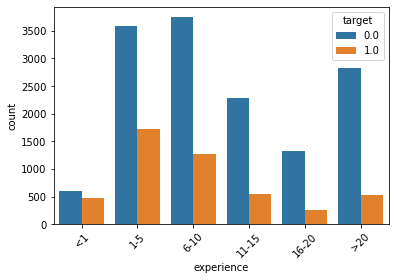

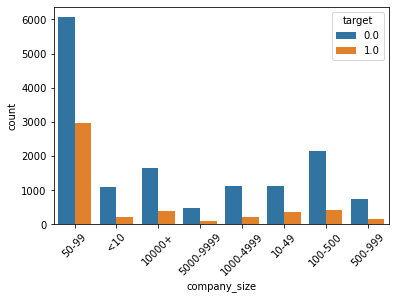

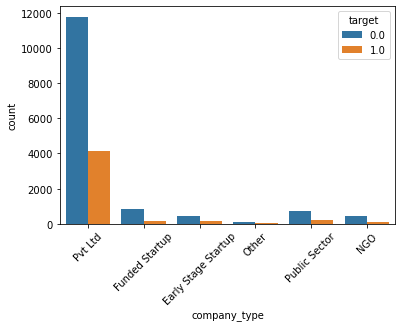

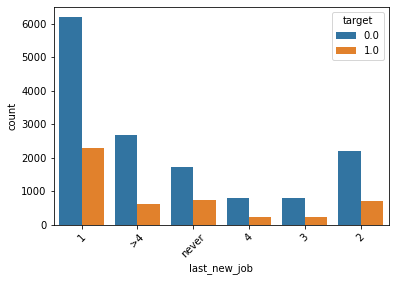

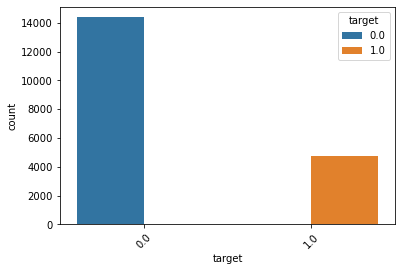

In [89]:
for i, predictor in enumerate(df.drop(columns=["city_development_index", "training_hours"])):
    plt.figure(i)
    sns.countplot(data = df, x = predictor, hue="target")
    plt.xticks(rotation=45)

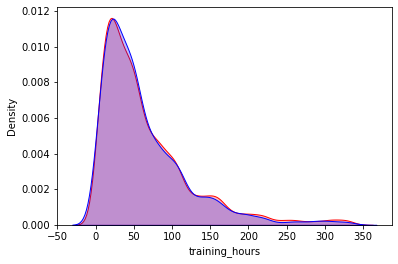

In [36]:
kdeplot_0 = sns.kdeplot(df.training_hours[df["target"] == 0], shade=True, color="red")
kdeplot_1 = sns.kdeplot(df.training_hours[df["target"] == 1], ax=kdeplot_0, shade=True, color="Blue")

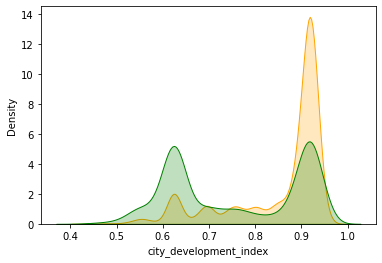

In [39]:
kdeplot_2 = sns.kdeplot(df["city_development_index"][df["target"] == 0], shade=True, color="orange")
kdeplot_3 = sns.kdeplot(df["city_development_index"][df["target"] == 1], shade=True, color="green", ax=kdeplot_2)

<AxesSubplot:>

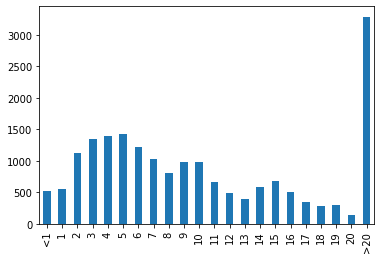

In [86]:
x_label = ["<1", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", ">20"]
df["experience_origin"].value_counts().loc[x_label].plot(kind="bar")

<AxesSubplot:xlabel='experience_origin,target'>

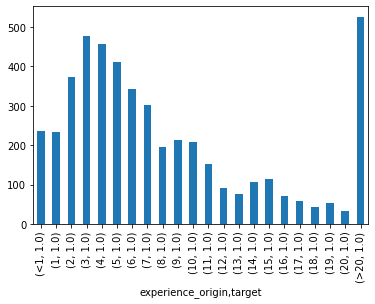

In [31]:
x_label = ["<1", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", ">20"]
df[df["target"] == 1].groupby("experience_origin")["target"].value_counts().loc[x_label].plot(kind="bar")

In [10]:
df_dummy = pd.get_dummies(df.drop(columns="experience_origin"), drop_first = True)
df_dummy.head()

,city_development_index,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.776,47,0.0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0.624,83,0.0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.789,52,1.0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0.767,8,0.0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

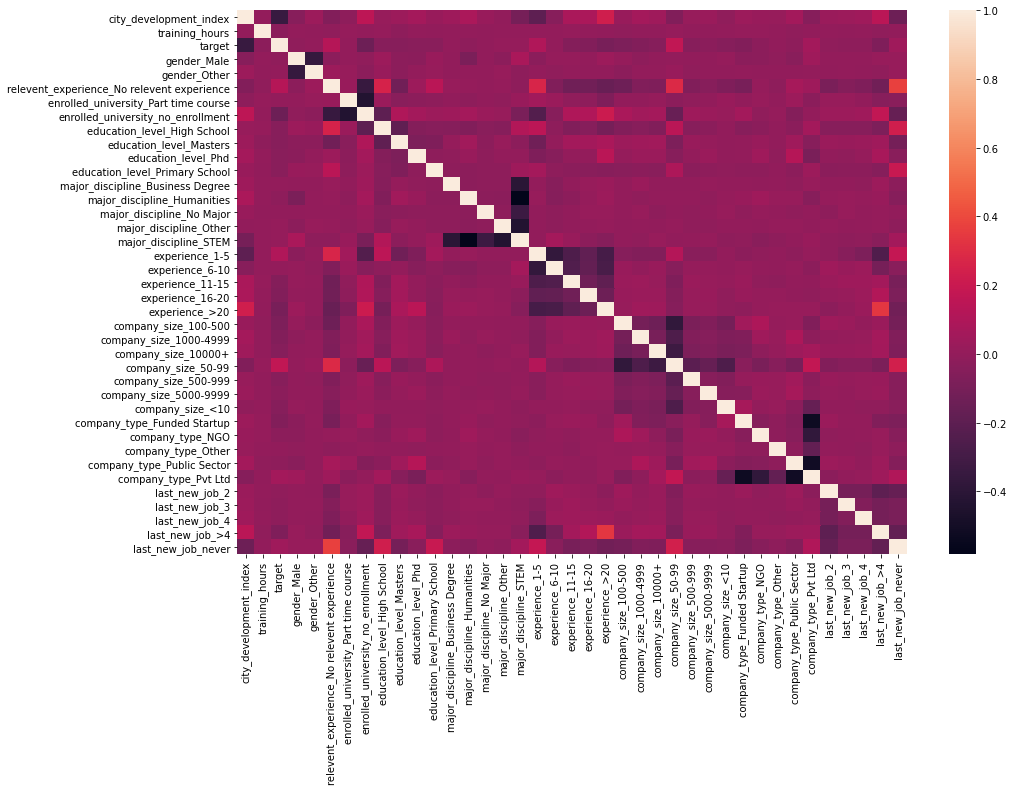

In [91]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dummy.corr())

<AxesSubplot:>

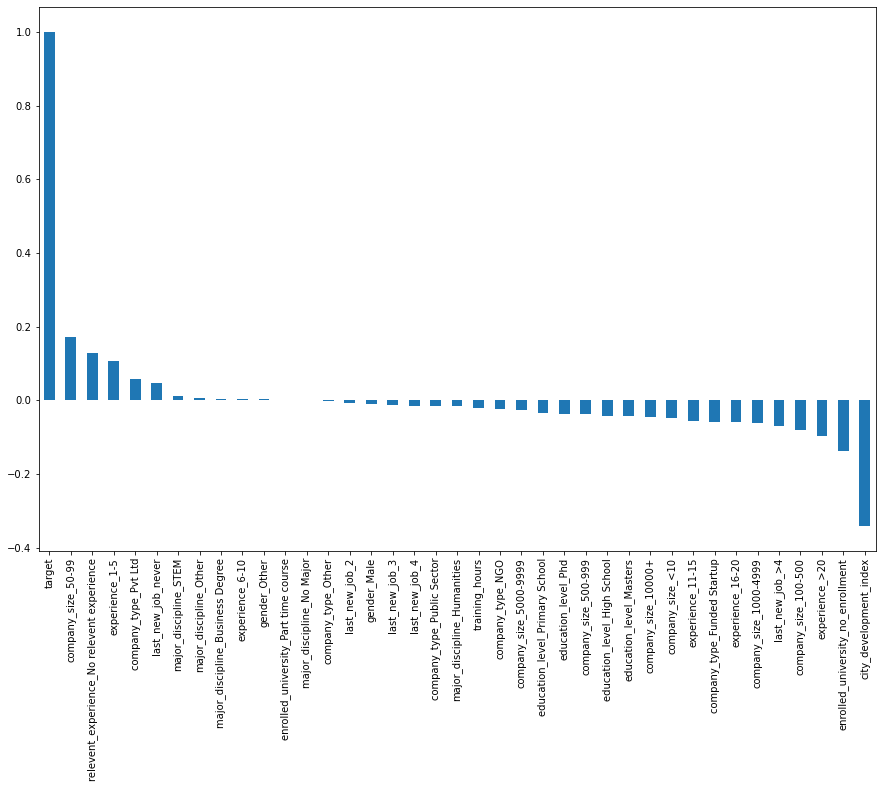

In [92]:
plt.figure(figsize=(15,10))
df_dummy.corr()["target"].sort_values(ascending=False).plot(kind="bar")

In [11]:
X = df_dummy.drop(columns = "target")
y = df_dummy["target"]

# Machine learning on the dataset

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, shuffle = True)

In [13]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
X_train = mmScaler.fit_transform(X_train)
X_test = mmScaler.transform(X_test)

## Decision tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtreemodel = DecisionTreeClassifier()
dtreemodel.fit(X_train, y_train)
predictions = dtreemodel.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      2880
         1.0       0.36      0.36      0.36       952

    accuracy                           0.68      3832
   macro avg       0.58      0.58      0.58      3832
weighted avg       0.68      0.68      0.68      3832



## kNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      2880
         1.0       0.43      0.29      0.35       952

    accuracy                           0.73      3832
   macro avg       0.61      0.58      0.59      3832
weighted avg       0.70      0.73      0.71      3832



## Naive Bayes classifier

In [23]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [24]:
y_pred = nb.predict(X_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.65      0.73      2880
         1.0       0.37      0.62      0.46       952

    accuracy                           0.64      3832
   macro avg       0.60      0.64      0.60      3832
weighted avg       0.72      0.64      0.67      3832



## Random forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2880
         1.0       0.50      0.38      0.43       952

    accuracy                           0.75      3832
   macro avg       0.66      0.63      0.64      3832
weighted avg       0.73      0.75      0.74      3832



Random forest overall gives better performance than Naive Bayes, kNN & decision tree

## Random forest without MinMaxScaler

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84      2880
         1.0       0.51      0.38      0.43       952

    accuracy                           0.75      3832
   macro avg       0.66      0.63      0.64      3832
weighted avg       0.73      0.75      0.74      3832



# Performance after upsampling techniques

## Random forest + SMOTENC

In [18]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTENC
clf = RandomForestClassifier()

X = df_dummy.drop(columns = "target")
y = df_dummy["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, shuffle = True)
a = np.array(list(range(2,38)))
sm = SMOTENC(random_state=42, categorical_features = a)
X_res, y_res = sm.fit_resample(X_train, y_train)


clf.fit(X_res, y_res)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      2880
         1.0       0.44      0.50      0.47       952

    accuracy                           0.72      3832
   macro avg       0.64      0.65      0.64      3832
weighted avg       0.73      0.72      0.73      3832



## Random forest + SMOTEENN

In [19]:
from imblearn.combine import SMOTEENN
clf = RandomForestClassifier()
X = df_dummy.drop(columns = "target")
y = df_dummy["target"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, shuffle = True)

sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X_train,y_train)


clf.fit(X_resampled1, y_resampled1)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.65      0.74      2880
         1.0       0.40      0.71      0.51       952

    accuracy                           0.66      3832
   macro avg       0.63      0.68      0.63      3832
weighted avg       0.75      0.66      0.68      3832



## Random forest + resampling

In [22]:
from sklearn.utils import resample
train, test = train_test_split(df_dummy, test_size = 0.2)

data_majority = train[train['target']==0]
data_minority = train[train['target']==1]
df_minority_upsampled = resample(data_minority, 
                                 replace=True,
                                 n_samples=len(train.loc[train['target'] == 0]),
                                 random_state=42) 

df_train = pd.concat([data_majority, df_minority_upsampled])
df_train_X = df_train.drop(columns = 'target')
df_train_y = df_train['target']
X_test = test.drop(columns="target")
y_test = test["target"]

clf = RandomForestClassifier()
clf.fit(df_train_X, df_train_y)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      2863
         1.0       0.52      0.46      0.49       969

    accuracy                           0.76      3832
   macro avg       0.67      0.66      0.66      3832
weighted avg       0.75      0.76      0.75      3832



Resampling techniques give better performance

# Feature importance

city_development_index, Score: 0.28777827104278214
training_hours, Score: 0.3122335398537035
gender_Male, Score: 0.014136684407793145
gender_Other, Score: 0.0032367672824760874
relevent_experience_No relevent experience, Score: 0.024184367191199957
enrolled_university_Part time course, Score: 0.008675333409288508
enrolled_university_no_enrollment, Score: 0.022742859688732263
education_level_High School, Score: 0.01552837112083623
education_level_Masters, Score: 0.021716530325723224
education_level_Phd, Score: 0.005825412528588437
education_level_Primary School, Score: 0.006696485804631412
major_discipline_Business Degree, Score: 0.004346736452123541
major_discipline_Humanities, Score: 0.006162779280051231
major_discipline_No Major, Score: 0.002750679516670208
major_discipline_Other, Score: 0.0034983564882979435
major_discipline_STEM, Score: 0.009862710612418479
experience_1-5, Score: 0.014547636006775232
experience_6-10, Score: 0.01516099679053604
experience_11-15, Score: 0.01171494485

<BarContainer object of 38 artists>

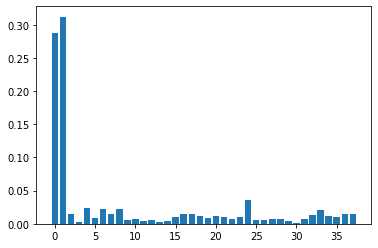

In [31]:
# define the model
model = RandomForestClassifier()

# data
train, test = train_test_split(df_dummy, test_size = 0.2)
data_majority = train[train['target']==0]
data_minority = train[train['target']==1]
df_minority_upsampled = resample(data_minority, 
                                 replace=True,
                                 n_samples=len(train.loc[train['target'] == 0]),
                                 random_state=42) 

df_train = pd.concat([data_majority, df_minority_upsampled])
df_train_X = df_train.drop(columns = 'target')
df_train_y = df_train['target']
df_test_X = test.drop(columns='target')
df_test_y = test['target']



# fit the model
model.fit(df_train_X, df_train_y)

# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('{}, Score: {}'.format(df_train_X.columns[i],v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)


# Hyperparameter searching

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

In [34]:
params={
    "n_estimators": [100,200,300,400,500,600,700,800],
    "max_leaf_nodes": [2,4,6,8,10,12,14,16,17, "None"],
    "min_samples_split": [2,10,30,50,70,90],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, "None"]
}

In [35]:
clf = RandomForestClassifier()

In [36]:
random_search=RandomizedSearchCV(clf, param_distributions = params, n_iter = 40,n_jobs=-1,cv=5,verbose=3)

In [37]:
train, test = train_test_split(df_dummy, test_size = 0.2)

In [38]:
data_majority = train[train['target']==0]
data_minority = train[train['target']==1]
df_minority_upsampled = resample(data_minority, 
                                 replace=True,
                                 n_samples=len(train.loc[train['target'] == 0]),
                                 random_state=42) 

df_train = pd.concat([data_majority, df_minority_upsampled])
df_train_X = df_train.drop(columns = 'target')
df_train_y = df_train['target']
df_test_X = test.drop(columns='target')
df_test_y = test['target']


In [40]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
df_train_X = mmScaler.fit_transform(df_train_X)
df_test_X = mmScaler.transform(df_test_X)

In [41]:
random_search.fit(df_train_X, df_train_y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\chfua\anaconda3\envs\rasa\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.71352693 0.709479          nan 0.72580046        nan 0.69642202
 0.69080732 0.71374451 0.69959916 0.72662743 0.71426677 0.70921795
 0.71666045 0.69224364 0.70682417 0.70268947        nan 0.72323265
 0.71561594 0.70508317 0.69150385 0.71174245        nan 0.71896731
 0.72105641        nan 0.68980661 0.69816298 0.71687818 0.72297143
 0.69111201 0.715616   0.72075163        nan 0.70656304 0.69241778
 0.70538794 0.71065414 0.71731344        nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      'None'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 4, 6, 8, 10, 12,
                                                           14, 16, 17, 'None'],
                                        'min_samples_split': [2, 10, 30, 50, 70,
                                                              90],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800]},
                   verbose=3)

In [42]:
random_search.best_estimator_

RandomForestClassifier(max_depth=14, max_features='sqrt', max_leaf_nodes=16,
                       min_samples_split=30, n_estimators=700)

In [51]:
random_forest_classifier = RandomForestClassifier(max_depth = 14, max_leaf_nodes=16, max_features="sqrt", n_estimators=700, min_samples_split=30)

In [52]:
random_forest_classifier.fit(df_train_X, df_train_y)

RandomForestClassifier(max_depth=14, max_features='sqrt', max_leaf_nodes=16,
                       min_samples_split=30, n_estimators=700)

In [53]:
y_pred = random_forest_classifier.predict(df_test_X)

In [54]:
print(classification_report(df_test_y, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.75      0.82      2893
         1.0       0.48      0.71      0.57       939

    accuracy                           0.74      3832
   macro avg       0.69      0.73      0.69      3832
weighted avg       0.79      0.74      0.76      3832



In [55]:
RFC = RandomForestClassifier()
RFC.fit(df_train_X, df_train_y)

RandomForestClassifier()

# PR curve

In [56]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

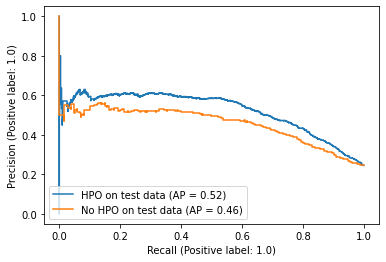

In [57]:
fig, axes = plt.subplots()
plot_precision_recall_curve(random_forest_classifier, df_test_X, df_test_y, ax=axes, name="HPO on test data")
plot_precision_recall_curve(RFC, df_test_X, df_test_y, ax=axes, name="No HPO on test data")

With hyperparameter optimization, the area under PR curve is larger.